In [26]:
from customize_minigrid.custom_env import CustomEnv
import matplotlib.pyplot as plt
import numpy as np
from mdp_learner import OneHotEncodingMDPLearner
from customize_minigrid.wrappers import FullyObsSB3MLPWrapper
from mdp_graph.mdp_graph import MDPGraph, PolicyGraph, OptimalPolicyGraph

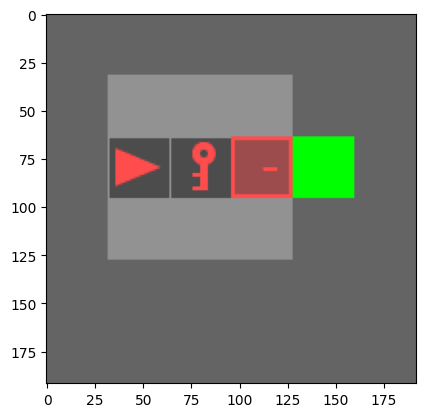

In [27]:
env = CustomEnv(
        txt_file_path='maps/door_key.txt',
        display_size=6,
        display_mode="middle",
        agent_start_pos=(1, 1),
        agent_start_dir=0,
        random_rotate=False,
        random_flip=False,
        custom_mission="Find the key and open the door.",
        render_mode=None,
    )
env.reset()
img = env.get_frame(env.highlight, env.tile_size, env.agent_pov)
plt.imshow(img)
plt.show()

In [28]:
env = FullyObsSB3MLPWrapper(env, to_print=False)
learner = OneHotEncodingMDPLearner(env)
learner.learn()

C:\Users\13769\anaconda3\envs\mini-grid-generation\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\13769\anaconda3\envs\mini-grid-generation\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\13769\anaconda3\envs\mini-grid-generation\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Added [state-action pair num: 1]: 4883078460180700372 -- 0 -> -3271466128631274883 Reward: -0.05
Added [state-action pair num: 2]: 8491043171962861805 -- 1 -> 8839252985863894087 Reward: -0.05
Added [state-action pair num: 3]: -9106962166313598826 -- 2 -> 1499428741089975488 Reward: -0.05
Added [state-action pair num: 4]: 1068998828498732276 -- 3 -> 324156329686651347 Reward: -0.05
Added [state-action pair num: 5]: -1542794672287902931 -- 4 -> 1499428741089975488 Reward: -0.05
Added [state-action pair num: 6]: -7166153387713029070 -- 5 -> 1499428741089975488 Reward: -0.05
Added [state-action pair num: 7]: 797461142789773185 -- 6 -> 1499428741089975488 Reward: -0.05
Added [state-action pair num: 8]: 1177695988362742681 -- 0 -> -2922669973035876377 Reward: -0.05
Added [state-action pair num: 9]: -1984640266760026593 -- 1 -> 3975732910115377268 Reward: -0.05
Added [state-action pair num: 10]: 5914737829975230320 -- 2 -> 2929242017602864260 Reward: -0.05
Added [state-action pair num: 11]: 

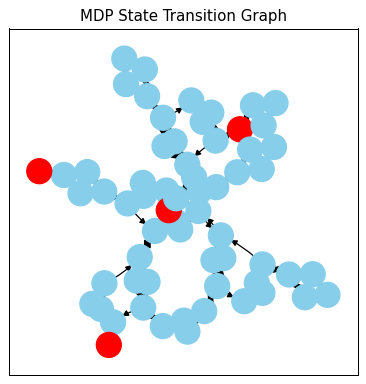

In [29]:
optimal_graph = OptimalPolicyGraph()
optimal_graph.load_graph(learner.mdp_graph)
optimal_graph.uniform_prior_policy()
optimal_graph.visualize(highlight_states=[learner.start_state, *learner.done_states], use_grid_layout=False, display_state_name=False)

In [30]:
optimal_graph.optimal_value_iteration(0.999, threshold=1e-5)
optimal_graph.compute_optimal_policy(0.999, threshold=1e-5)
optimal_graph.control_info_iteration(1.0, threshold=1e-5)
optimal_graph.value_iteration(1.0, threshold=1e-5)

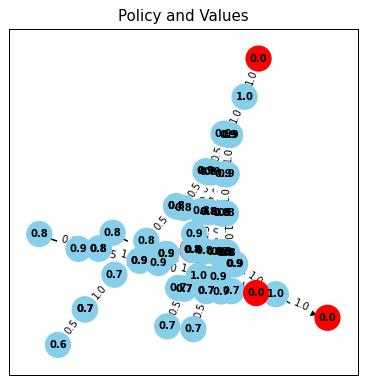

In [31]:
optimal_graph.visualize_policy_and_values(title="Policy and Values", value_type="value",
                                              highlight_states=[learner.start_state, *learner.done_states],
                                              use_grid_layout=False, display_state_name=False)

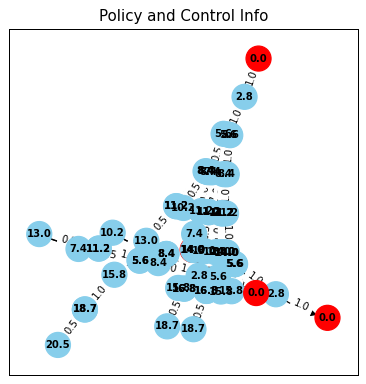

In [32]:
optimal_graph.visualize_policy_and_values(title="Policy and Control Info", 
                                          value_type="control_info",
                                          highlight_states=[learner.start_state, *learner.done_states],
                                          use_grid_layout=False, display_state_name=False)